
### ADMN5016: Assignment: Proof of Concept for Machine Learning Application

# 1. The value of the Machine Learning Algorithm

## 1. What problem your application solves?

My application is a binary classification image. This kind of application can be useful for surveillance or facial recognition. I.E. detecting if a person is using glasses, a face mask, hat, etc.

Also, can be used to prevent programs filling forms in webpages by the use of captcha.

In general, there's a wide variety in utilization of Image Processing and binary classification


## 2. Explain your results.

I perfomed two different models:
* The first one was CNN Sequential with Rectified Linea Unit (RELU) and  Sigmoid activation  and optimizer RMSprop  defining a learining rate of 0.0001 (1e-4).
> * The first attemp without dropout, this causes my model overfitting.
> * The second attemp with dropout (at 50%), had a better accuracy.
> > In the second attempt also added some adjustments to the image properties like rotation, width, height, zoom & flip
* The second one was CNN Sequential with Rectified Linea Unit (RELU) and  Sigmoid activation functions and optimizer Adam.

## 3. What is the monetary value and risks of your application after its performance?

This is an Artificial Intelligence model. This model achieves a 70%-80% accuracy; therefore, this is not an application that must be fully trustable. There are some wrong predictions and misclassification. Nonetheless, this program can save much time with image processing for companies' applications. Also, if this program is used to add an extra layer of security in web forms, this can prevent attacks on the site, saving money by preventing these attacks.

## 4. Other risks and benefits

As mentioned before, Image Processing has a wide variety of applications nowadays that can be useful for companies.

For example, in some places, during the COVID-19 pandemic, some companies purchased equipment and applications to detect whether a person is wearing a face mask.

These applications are very useful as well for surveillance. In police departments, some applications can detect a person's face that is wanted. This would lead to further investigation and possible detention of the person.

And regarding risks, technology is not 100% trustworthy. In most cases, there are misclassification or wrong predictions. Returning to the surveillance example, the facial recognition of an individual may lead to the detention of the wrong person. Thus, legal problems for the violation of the rights of an individual.

# AI Application

## Preparing the data

In [ ]:
# Importing "Cat and Dog" dataset from Kaggle

import os
os.environ['KAGGLE_USERNAME'] = "rolpablo"
os.environ['KAGGLE_KEY'] = "665c3138c29f5524cafc357abf9647f4"
!kaggle datasets download -d tongpython/cat-and-dog

 89% 193M/218M [00:02<00:00, 74.3MB/s]
100% 218M/218M [00:02<00:00, 97.4MB/s]


In [ ]:
# Unzip and upload data to session

from zipfile import ZipFile

file_name = "/content/cat-and-dog.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print("Completed")

Completed


In [ ]:
# Create folder structure that will contain all data
data_dir = '/content/data'
os.mkdir(data_dir)

cats_data_dir = os.path.join(data_dir, "cats")
os.mkdir(cats_data_dir)

dogs_data_dir = os.path.join(data_dir, "dogs")
os.mkdir(dogs_data_dir)

In [ ]:
# Copy files to data/cats
import shutil

original_cats_dir = '/content/test_set/test_set/cats'

fnames = ['cat.{}.jpg'.format(i) for i in range(4001,4999)]
for fname in fnames:
    src = os.path.join(original_cats_dir, fname)
    dst = os.path.join(cats_data_dir, fname)
    shutil.copyfile(src, dst)

original_cats_dir = '/content/training_set/training_set/cats'

fnames = ['cat.{}.jpg'.format(i) for i in range(1, 4000)]
for fname in fnames:
    src = os.path.join(original_cats_dir, fname)
    dst = os.path.join(cats_data_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Count number of files in data/cats
path, dirs, files = next(os.walk("/content/data/cats"))
file_count_cats = len(files)
print(file_count_cats)

4997


In [ ]:
# Copy files to data/dogs

original_dogs_dir = '/content/test_set/test_set/dogs'

fnames = ['dog.{}.jpg'.format(i) for i in range(4001,4999)]
for fname in fnames:
    src = os.path.join(original_dogs_dir, fname)
    dst = os.path.join(dogs_data_dir, fname)
    shutil.copyfile(src, dst)

original_dogs_dir = '/content/training_set/training_set/dogs'

fnames = ['dog.{}.jpg'.format(i) for i in range(1, 4000)]
for fname in fnames:
    src = os.path.join(original_dogs_dir, fname)
    dst = os.path.join(dogs_data_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Count number of files in data/dogs
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count_dogs = len(files)
print(file_count_dogs)

4997


In [ ]:
# Remove original directories
shutil.rmtree('/content/test_set')
shutil.rmtree('/content/training_set')

In [ ]:
# Create new folder structure
base_directory = '/content/cats_and_dogs'
os.mkdir(base_directory)

training_directory = os.path.join(base_directory, 'train')
os.mkdir(training_directory)

validation_directory = os.path.join(base_directory, 'validation')
os.mkdir(validation_directory)

test_directory = os.path.join(base_directory, 'test')
os.mkdir(test_directory)

tr_cats_dir = os.path.join(training_directory, "cats")
os.mkdir(tr_cats_dir)

tr_dogs_dir = os.path.join(training_directory, "dogs")
os.mkdir(tr_dogs_dir)

va_cats_dir = os.path.join(validation_directory, "cats")
os.mkdir(va_cats_dir)

va_dogs_dir = os.path.join(validation_directory, "dogs")
os.mkdir(va_dogs_dir)

te_cats_dir = os.path.join(test_directory, "cats")
os.mkdir(te_cats_dir)

te_dogs_dir = os.path.join(test_directory, "dogs")
os.mkdir(te_dogs_dir)

In [ ]:
# Copy cat files to new folder structure
data_cats_dir = '/content/data/cats'

fnames = ['cat.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(data_cats_dir, fname)
    dst = os.path.join(tr_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1001,2001)]
for fname in fnames:
    src = os.path.join(data_cats_dir, fname)
    dst = os.path.join(va_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(2001,3001)]
for fname in fnames:
    src = os.path.join(data_cats_dir, fname)
    dst = os.path.join(te_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copy dog files to new folder structure
data_dogs_dir = '/content/data/dogs'

fnames = ['dog.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(data_dogs_dir, fname)
    dst = os.path.join(tr_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1001,2001)]
for fname in fnames:
    src = os.path.join(data_dogs_dir, fname)
    dst = os.path.join(va_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(2001,3001)]
for fname in fnames:
    src = os.path.join(data_dogs_dir, fname)
    dst = os.path.join(te_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print("Total training cats images: ", len(os.listdir(tr_cats_dir)))
print("Total validation cats images: ", len(os.listdir(va_cats_dir)))
print("Total test cats images: ", len(os.listdir(te_cats_dir)))

print("Total training dogs images: ", len(os.listdir(tr_dogs_dir)))
print("Total validation dogs images: ", len(os.listdir(va_dogs_dir)))
print("Total test dogs images: ", len(os.listdir(te_dogs_dir)))

Total training cats images:  1000
Total validation cats images:  1000
Total test cats images:  1000
Total training dogs images:  1000
Total validation dogs images:  1000
Total test dogs images:  1000


## Model 1

In [ ]:
import keras
from keras import layers
from keras import models

model = models.Sequential()

# Fisrt layer
# Kernel = 32
# Size = 3 x 3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Second layer
# Kernel = 64
# Size = 3 x 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Third layer
# Kernel = 128
# Size = 3 x 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Fourth layer
# Kernel = 128
# Size = 3 x 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Flattening model
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras import optimizers

model.compile (loss = 'binary_crossentropy', 
                            optimizer = optimizers.RMSprop(lr = 1e-4),
                            metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(training_directory,
                                                     target_size = (150, 150),
                                                     batch_size = 20,
                                                     class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_directory,
                                                     target_size = (150, 150),
                                                     batch_size = 20,
                                                     class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                                                        steps_per_epoch= 100,
                                                        epochs = 30,
                                                        validation_data = validation_generator,
                                                        validation_steps = 10)
model.save('cats_and_dogs_1.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
100/100 [==============================] - 20s 70ms/step - loss: 0.6875 - acc: 0.5480 - val_loss: 0.7221 - val_acc: 0.4900
Epoch 2/30
100/100 [==============================] - 7s 72ms/step - loss: 0.6616 - acc: 0.6110 - val_loss: 0.6491 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 7s 70ms/step - loss: 0.6093 - acc: 0.6760 - val_loss: 0.6278 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5746 - acc: 0.6985 - val_loss: 0.6176 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5389 - acc: 0.7280 - val_loss: 0.5872 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 7s 70ms/step - loss: 0.4993 - acc: 0.7505 - val_loss: 0.5684 - val_acc: 0.7250
Epoch 7/30
100/100 [==============================] - 7s 71ms/step - loss: 0.4744 - acc: 0.7680 - val_loss: 0.5303 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 7s 70ms/step -

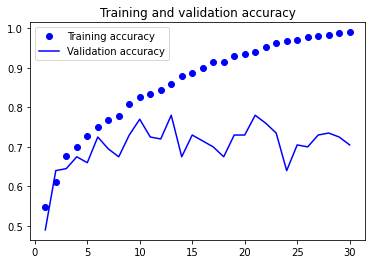

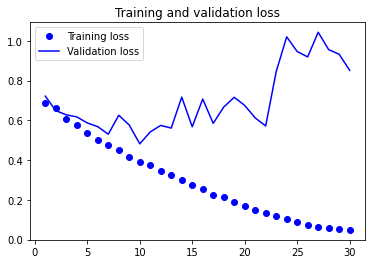

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 1 v2

In [ ]:
model = models.Sequential()

# Fisrt layer
# Kernel = 32
# Size = 3 x 3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Second layer
# Kernel = 64
# Size = 3 x 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Third layer
# Kernel = 128
# Size = 3 x 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Fourth layer
# Kernel = 128
# Size = 3 x 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

# Flattening model
model.add(layers.Flatten())

# Adding Dropout
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile (loss = 'binary_crossentropy', 
                            optimizer = optimizers.RMSprop(lr = 1e-4),
                            metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Image Adjustments

train_datagen = ImageDataGenerator(rescale=1./255,
                                                                        rotation_range=40,
                                                                        width_shift_range=0.2,
                                                                        height_shift_range=0.2,
                                                                        shear_range=0.2,
                                                                        zoom_range=0.2,
                                                                        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255,
                                                                        rotation_range=40,
                                                                        width_shift_range=0.2,
                                                                        height_shift_range=0.2,
                                                                        shear_range=0.2,
                                                                        zoom_range=0.2,
                                                                        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(training_directory,
                                                                                                    target_size = (150, 150),
                                                                                                    batch_size = 20,
                                                                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_directory,
                                                                                                                        target_size = (150, 150),
                                                                                                                        batch_size = 20,
                                                                                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                                                        steps_per_epoch= 100,
                                                        epochs = 30,
                                                        validation_data = validation_generator,
                                                        validation_steps = 50)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


100/100 [==============================] - 27s 259ms/step - loss: 0.6957 - acc: 0.5015 - val_loss: 0.6882 - val_acc: 0.5530
Epoch 2/30
100/100 [==============================] - 27s 266ms/step - loss: 0.6851 - acc: 0.5565 - val_loss: 0.7101 - val_acc: 0.5010
Epoch 3/30
100/100 [==============================] - 25s 256ms/step - loss: 0.6766 - acc: 0.5670 - val_loss: 0.6619 - val_acc: 0.5910
Epoch 4/30
100/100 [==============================] - 25s 255ms/step - loss: 0.6600 - acc: 0.5895 - val_loss: 0.6483 - val_acc: 0.6040
Epoch 5/30
100/100 [==============================] - 22s 224ms/step - loss: 0.6422 - acc: 0.6165 - val_loss: 0.6447 - val_acc: 0.6360
Epoch 6/30
100/100 [==============================] - 22s 225ms/step - loss: 0.6280 - acc: 0.6340 - val_loss: 0.6440 - val_acc: 0.6350
Epoch 7/30
100/100 [==============================] - 22s 222ms/step - loss: 0.6192 - acc: 0.6595 - val_loss: 0.6349 - val_acc: 0.6320
Epoch 8/30
100/100 [==============================] - 22s 224ms/st

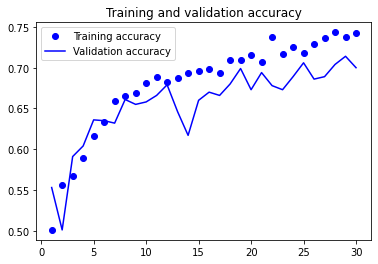

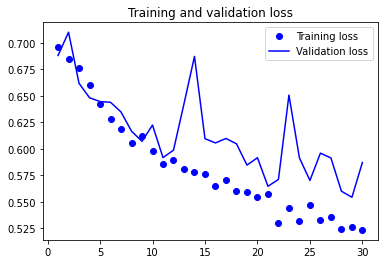

In [ ]:
accuracy = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 2

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1/255,
                                                                        shear_range = 0.2,
                                                                        horizontal_flip = True)

validation_data_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_path = '/content/cats_and_dogs/train'
train_set = train_data_gen.flow_from_directory(
    train_path, target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_path = ('/content/cats_and_dogs/validation')
validation_set = validation_data_gen.flow_from_directory(
    validation_path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
model = Sequential()

# Layer 1
model.add(Conv2D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (64,64,3)))
model.add(MaxPool2D())

# Layer 2
model.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(MaxPool2D())

# Layer 3
model.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu'))
model.add(MaxPool2D())

# Flattening model
model.add(Flatten())

# ANN Layer 1
model.add(Dense(128, activation='relu'))

# ANN Layer 2
model.add(Dense(64, activation='sigmoid'))

# ANN Layer 3
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 63, 63, 32)        416       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 128)       

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = 'accuracy
    ')

In [ ]:
model.save('cats_and_dogs_2.h5')

In [ ]:
history = model.fit(train_set,
                    epochs = 20,
                    validation_data = validation_set,
                    batch_size = 32)

Epoch 1/20
63/63 [==============================] - 12s 184ms/step - loss: 0.1313 - accuracy: 0.9495 - val_loss: 0.7236 - val_accuracy: 0.7390
Epoch 2/20
63/63 [==============================] - 11s 180ms/step - loss: 0.1446 - accuracy: 0.9440 - val_loss: 0.7492 - val_accuracy: 0.7435
Epoch 3/20
63/63 [==============================] - 11s 181ms/step - loss: 0.0996 - accuracy: 0.9650 - val_loss: 0.8132 - val_accuracy: 0.7380
Epoch 4/20
63/63 [==============================] - 11s 182ms/step - loss: 0.0830 - accuracy: 0.9715 - val_loss: 0.8573 - val_accuracy: 0.7430
Epoch 5/20
63/63 [==============================] - 11s 183ms/step - loss: 0.1326 - accuracy: 0.9445 - val_loss: 0.8324 - val_accuracy: 0.7495
Epoch 6/20
63/63 [==============================] - 11s 180ms/step - loss: 0.0719 - accuracy: 0.9725 - val_loss: 0.8765 - val_accuracy: 0.7355
Epoch 7/20
63/63 [==============================] - 11s 181ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.9826 - val_accuracy: 0.7275

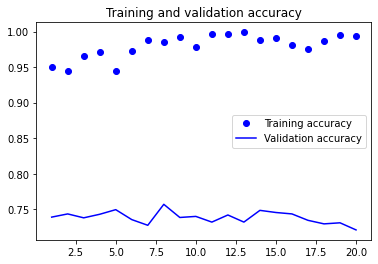

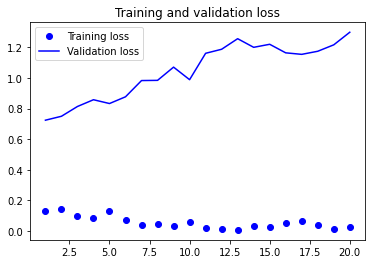

In [ ]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()